# Video 0: Data Setup

In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
superconductivty_data = fetch_ucirepo(id=464)

# data (as pandas dataframes)
X = superconductivty_data.data.features
y = superconductivty_data.data.targets

df = X.join(y)

In [13]:
df.head(20)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,high_or_low_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0,0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0,0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0,0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0,0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0,0
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.0,0
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.90607,10.765639,51.968828,...,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,11.0,0
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,...,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.0,0
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,...,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,36.0,0
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,...,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,31.0,0


In [ ]:
#getting new output column with 0 and 1 values, whether the critical temp is >77,
#i.e. a "high temperature" superconductor. 77K is the boiling point of nitrogen
o = df['critical_temp'].values
df['high_or_low_temp'] = (o > 77).astype(int)
y = df['high_or_low_temp']

y.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    0
Name: high_or_low_temp, dtype: int64

<Axes: xlabel='wtd_std_ThermalConductivity', ylabel='high_or_low_temp'>

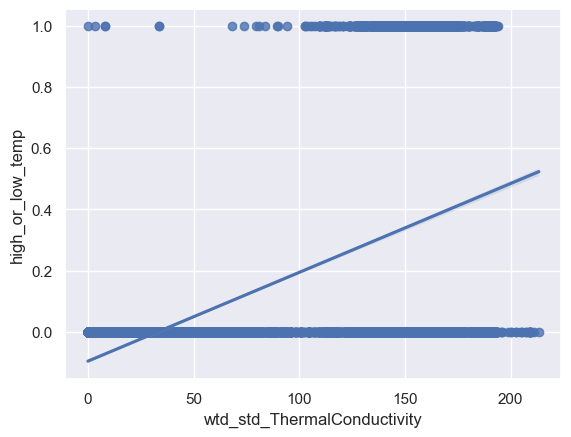

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.regplot(
    data = df,
    x = 'wtd_std_ThermalConductivity',
    y = 'high_or_low_temp'
)

# Video 2: First Model

In [18]:
#import model
from sklearn.linear_model import LogisticRegression

In [ ]:
#creating and fitting model
model = LogisticRegression(max_iter=10000)
#scores returned by different max iterations: default: 0.872, 500:0.878, 5000: 0.888, 10000: 0.892
model.fit(X, y)

#score model
model.score(X,y)

C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8916897897756666

# Video 3: Adjusting C

In [55]:
model = LogisticRegression(max_iter=1000, C=0.8)
#scores by different values of C: 1: 0.882, 0.8: 0.885, 0.6:0.882, 0.7:0.881, 0.75: 0.882, 0.1:0.884
model.fit(X, y)

#score model
model.score(X, y)

C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8848234021539764

In [ ]:
#try warm start
#model.warm_start = True

model.fit(X, y)

model.score(X, y)
#score after runs with warm start: 0: 0.8848, 1: 0.8845, 2: 0.8876, 3: 0.8877, 4: 0.8891, 5: 0.8880, 6: 0.8891, 7: 0.8880, 8: 0.8894, 9: 0.8889, 10: 0.8901

C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8900907680007525

# Video 4: Probabilities

In [68]:
df.tail()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,high_or_low_temp
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44,0
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10,1
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98,0
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84,0
21262,3,87.468333,86.858500,82.555758,80.458722,1.041270,0.895229,71.75500,43.144000,29.905282,...,4.762203,4.242641,1.054920,0.970116,3,1.800000,1.414214,1.500000,12.80,0


In [69]:
model.predict(X.iloc[-5:, :])

array([0, 1, 0, 0, 0])

In [71]:
model.predict_proba(X.iloc[-5:, :])

array([[9.99999998e-01, 2.28929567e-09],
       [2.63097627e-02, 9.73690237e-01],
       [1.00000000e+00, 2.96955766e-25],
       [1.00000000e+00, 2.86702658e-25],
       [1.00000000e+00, 4.21372667e-12]])

# Video 5: Convert Regressor to Classifier

In [73]:
# I already did this with my dataset